In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

In [48]:
data = pd.read_csv("../../datas/Cali Emissions.csv", header = 0, delimiter = ",", names=["Year", "CO2"])
data.head(5)

,Year,CO2
0,1980,346.183721
1,1981,334.381538
2,1982,298.004398
3,1983,293.436371
4,1984,315.858105


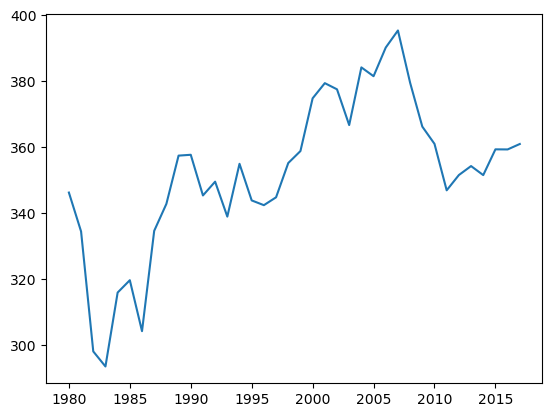

In [49]:
plt.plot(data["Year"], data["CO2"])
plt.show()

In [50]:
adfuller(data["CO2"])

(-1.6043819955568714,
 0.48139190562202283,
 0,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 198.68496233324055)

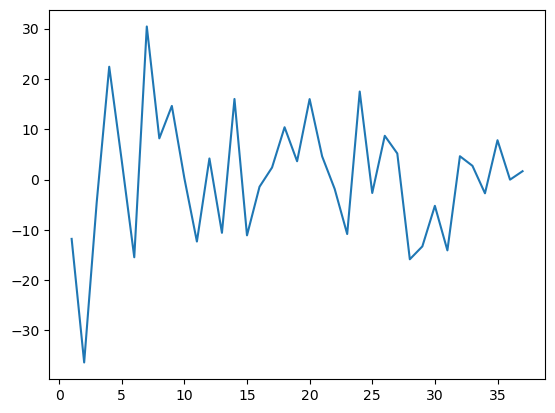

(-5.748762300879066,
 6.034785265900472e-07,
 0,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 192.82497907755067)

In [51]:
X_CO2_diff_1 = data["CO2"].diff().dropna()
plt.plot(X_CO2_diff_1)
plt.show()
adfuller(X_CO2_diff_1)

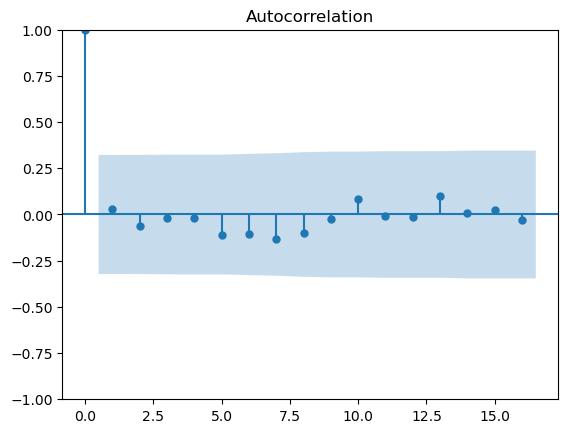

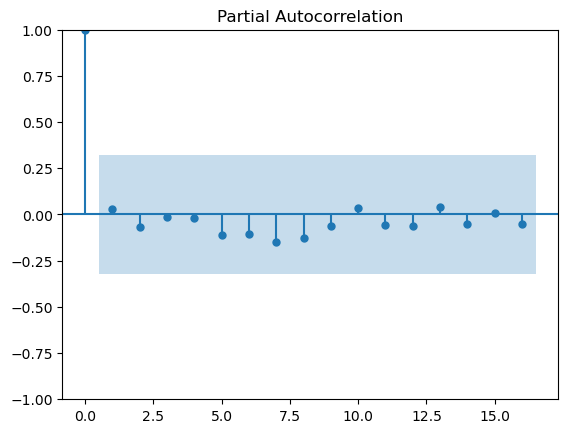

In [52]:
plot_acf(X_CO2_diff_1)
plt.show()
plot_pacf(X_CO2_diff_1)
plt.show()

In [53]:
model_fit = ARIMA(data["CO2"], order=(13, 1, 13)).fit()
print(model_fit.summary())

c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                   38
Model:               ARIMA(13, 1, 13)   Log Likelihood                -139.797
Date:                Mon, 02 Dec 2024   AIC                            333.593
Time:                        09:29:56   BIC                            377.088
Sample:                             0   HQIC                           348.927
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0619     14.009      0.004      0.996     -27.395      27.519
ar.L2          0.5466     13.172      0.041      0.967     -25.271      26.364
ar.L3         -0.6509      5.048     -0.129      0.8

c:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


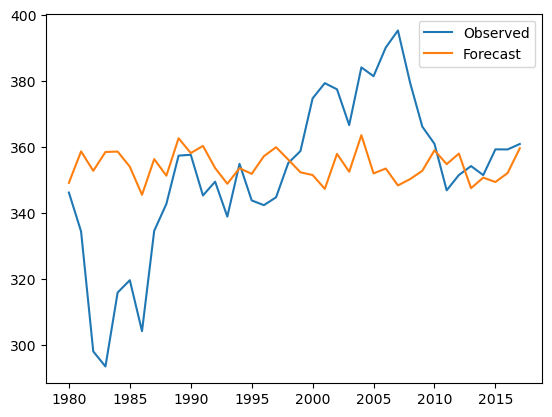

In [54]:
forecast = model_fit.forecast(steps=len(data["CO2"]))
plt.plot(data["Year"], data["CO2"], label="Observed")
plt.plot(data["Year"], forecast, label="Forecast")
plt.legend()
plt.show()